In [ ]:
import pandas as pd
import numpy as np


In [ ]:

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTDsF-Aey_9_nQWZPFiAZgavpg8p2WEH0oLtofQI9E7XoCQrpe7uSlyqcFnGibYTrpy6RnIa2Vq1Dba/pub?output=csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [ ]:
num_rows, num_cols = df.shape
print(num_rows, num_cols)

6497 13


In [ ]:
df = df.iloc [ :,1:num_cols] # Dropping off first element
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [ ]:
num_rows, num_cols = df.shape
print(num_rows, num_cols)

6497 12


In [ ]:
data = df.values

In [ ]:
# Build our x variables and y variables
y_idx = 10
x_idxs = [ ]
# Add every index that isnt our output
for i in range(num_cols):
  if i != y_idx:
    x_idxs.append(i)

In [ ]:
print(x_idxs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]


In [ ]:
X, y = data[:, x_idxs], data[:, y_idx]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =1)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5197, 11) (1300, 11) (5197,) (1300,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_hat = model.predict(X_test)
from sklearn.metrics import mean_absolute_error

In [ ]:
avg_error = mean_absolute_error(y_test, y_hat)
print(avg_error) # This is how wrong you are on the percentage of alcohol in the wine.

0.39134899292515885


In [ ]:
import matplotlib.pyplot as plt


(6.0, 15.0)

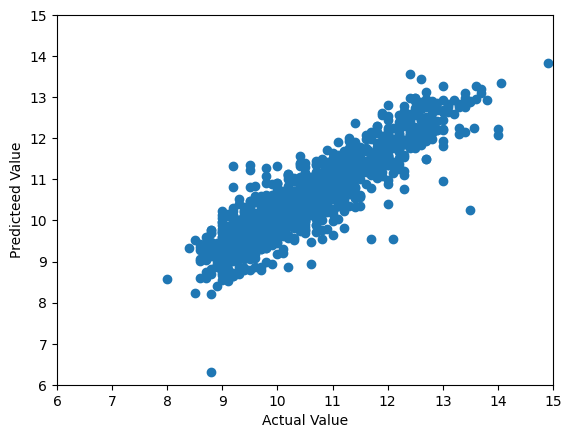

In [ ]:
plt.scatter(y_test, yhat)
plt.xlabel("Actual Value")
plt.ylabel("Predicteed Value")
plt.xlim(6,15)
plt.ylim(6,15)

In [ ]:
var_names = df.columns
print(var_names)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
coeffs = model.coef_

In [ ]:
intercept = model.intercept_
print(f"The amount of {var_names[y_idx]} is modelled by: ")
x_var_names = df.columns.tolist()
x_var_names.remove(var_names[y_idx])


The amount of alcohol is modelled by: 


In [ ]:
for i in range(len(x_var_names)):
  print(f"{coeffs[i]} times {x_var_names[i]}") # In order to reduce the amount of error, these are the slopes that it came out with
  # You can change the curve and lines of best fit
  # This is a general template

0.532381777899273 times fixed acidity
1.498574029434151 times volatile acidity
0.4707480334174376 times citric acid
0.19428363369873156 times residual sugar
0.16815912386883 times chlorides
-0.000285717403814556 times free sulfur dioxide
-0.004068603501881762 times total sulfur dioxide
-575.7671093027194 times density
2.810989214888629 times pH
1.3184300986310602 times sulphates
0.14316040007356756 times quality
